In [19]:
from BNumMet import Random

In [20]:
arr = [1]

In [21]:
if len(arr) >= 3:
    print((6 * arr[-1] - 9 * arr[-2]) % 1)  # Test
aux = Random.lehmers_rand(a=2**16 + 3, m=2**31, c=0, x=arr[-1])
arr.append(aux)
print(arr)

[1, 0.00018310965970158577]


In [22]:
testArr = [0, 1]

In [23]:
aux = Random.marsaglia_rand(
    base=10, lag_r=2, lag_s=1, carry=0, seed_tuple=(0, 1)
)  # testArr = [0, 1, 9, 1, 7, 4, 2, 2, 0, 2, 8, 3, 4, 9]
testArr.append(aux)
print(testArr)

[0, 1, 1]


In [24]:
Random.genrand()

0.24714033753777395

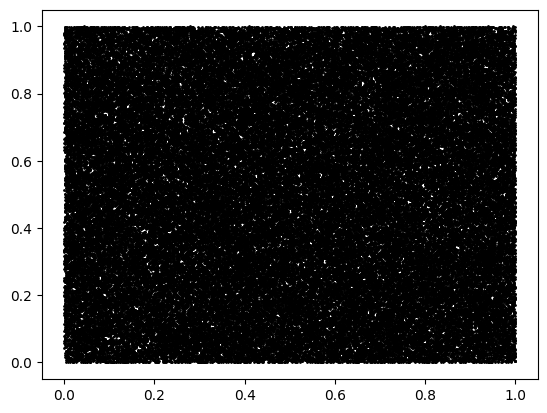

In [25]:
# Test Random.genrand()
import matplotlib.pyplot as plt

xy = [(Random.genrand(), Random.genrand()) for i in range(100000)]
plt.scatter(*zip(*xy), s=1, c="black")

In [35]:
import numpy
from nistrng import *

# Test genrand from nistrng
sequence = numpy.array(
    [Random.genrand() * 0xFFFFFFFF for i in range(100)], dtype=numpy.uint64
)


binary_sequence: numpy.ndarray = pack_sequence(sequence)

# Check the eligibility of the test and generate an eligible battery from the default NIST-sp800-22r1a battery
eligible_battery: dict = check_eligibility_all_battery(
    binary_sequence, SP800_22R1A_BATTERY
)

# Test the sequence on the eligible tests
results = run_all_battery(binary_sequence, eligible_battery, False)
# Print results one by one
results = [result.passed for result, _ in results if result.passed]
print(results)

[True, True, True, True, True, True, True, True, True, True]
